# Predict_CO2_Emissions_in_Rwanda

In [1]:
import pandas as pd

In [12]:
df=pd.read_csv('train.csv')

In [13]:
df

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,SulphurDioxide_solar_azimuth_angle,SulphurDioxide_solar_zenith_angle,SulphurDioxide_SO2_column_number_density_15km,CarbonMonoxide_CO_column_number_density,CarbonMonoxide_H2O_column_number_density,CarbonMonoxide_cloud_height,CarbonMonoxide_sensor_altitude,CarbonMonoxide_sensor_azimuth_angle,CarbonMonoxide_sensor_zenith_angle,CarbonMonoxide_solar_azimuth_angle,CarbonMonoxide_solar_zenith_angle,NitrogenDioxide_NO2_column_number_density,NitrogenDioxide_tropospheric_NO2_column_number_density,NitrogenDioxide_stratospheric_NO2_column_number_density,NitrogenDioxide_NO2_slant_column_number_density,NitrogenDioxide_tropopause_pressure,NitrogenDioxide_absorbing_aerosol_index,NitrogenDioxide_cloud_fraction,NitrogenDioxide_sensor_altitude,NitrogenDioxide_sensor_azimuth_angle,NitrogenDioxide_sensor_zenith_angle,NitrogenDioxide_solar_azimuth_angle,NitrogenDioxide_solar_zenith_angle,Formaldehyde_tropospheric_HCHO_column_number_density,Formaldehyde_tropospheric_HCHO_column_number_density_amf,Formaldehyde_HCHO_slant_column_number_density,Formaldehyde_cloud_fraction,Formaldehyde_solar_zenith_angle,Formaldehyde_solar_azimuth_angle,Formaldehyde_sensor_zenith_angle,Formaldehyde_sensor_azimuth_angle,UvAerosolIndex_absorbing_aerosol_index,UvAerosolIndex_sensor_altitude,UvAerosolIndex_sensor_azimuth_angle,UvAerosolIndex_sensor_zenith_angle,UvAerosolIndex_solar_azimuth_angle,UvAerosolIndex_solar_zenith_angle,Ozone_O3_column_number_density,Ozone_O3_column_number_density_amf,Ozone_O3_slant_column_number_density,Ozone_O3_effective_temperature,Ozone_cloud_fraction,Ozone_sensor_azimuth_angle,Ozone_sensor_zenith_angle,Ozone_solar_azimuth_angle,Ozone_solar_zenith_angle,UvAerosolLayerHeight_aerosol_height,UvAerosolLayerHeight_aerosol_pressure,UvAerosolLayerHeight_aerosol_optical_depth,UvAerosolLayerHeight_sensor_zenith_angle,UvAerosolLayerHeight_sensor_azimuth_angle,UvAerosolLayerHeight_solar_azimuth_angle,UvAerosolLayerHeight_solar_zenith_angle,Cloud_cloud_fraction,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-0.510_29.290_2019_00,-0.510,29.290,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,50.843559,-130.050797,35.874496,-0.000027,0.035370,1589.024536,4061.098145,829530.500000,71.111977,52.775928,-149.875565,25.965214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000117,0.863230,0.000038,0.255668,35.874496,-130.050797,50.843559,-98.593887,-1.280761,829864.546875,-12.628979,35.632416,-138.786446,30.752128,0.115927,2.506609,0.295663,225.731144,0.595473,-12.628979,35.632416,-138.786446,30.752128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.595473,53534.732422,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
1,ID_-0.510_29.290_2019_01,-0.510,29.290,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,39.137194,-140.874435,28.965133,0.000012,0.036526,1772.574405,1869.040414,829787.287130,-1.019594,38.982368,-140.158048,29.562000,0.000047,1.639765e-05,0.000030,0.000093,7311.869141,-1.935386,0.067038,829859.960368,5.471037,35.265195,-138.343908,30.054262,0.000170,1.172826,0.000143,0.200754,29.071781,-141.814827,43.050213,4.678839,-1.548119,829747.856973,16.152492,43.485327,-142.786141,28.573627,0.116775,2.657704,0.315733,226.172170,0.175166,24.464335,42.596541,-143.097868,28.213655,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.213608,63790.296241,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
2,ID_-0.510_29.290_2019_02,-0.510,29.290,2019,2,0.000514,0.748199,0.000385,0.110

In [6]:
#pip install pycaret

In [5]:
from pycaret.regression import*

In [7]:
df = df.sample(n=10000, random_state=42)

In [8]:
setup(data=df,target='emission')

,Description,Value
0,Session id,6337
1,Target,emission
2,Target type,Regression
3,Original data shape,"(10000, 76)"
4,Transformed data shape,"(10000, 76)"
5,Transformed train set shape,"(7000, 76)"
6,Transformed test set shape,"(3000, 76)"
7,Numeric features,74
8,Categorical features,1
9,Rows with missing values,99.4%


In [9]:
best_model=compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,03:55:00
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Random Forest Regressor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
dt,Decision Tree Regressor,71.4512,17165.0033,128.3104,-0.0013,1.9281,96.0321,0.8790
lr,Linear Regression,71.4448,17165.3801,128.3121,-0.0014,1.9279,96.0241,1.0270
lasso,Lasso Regression,71.4446,17165.3632,128.3121,-0.0014,1.9279,96.0226,0.1410
ridge,Ridge Regression,71.4448,17165.3795,128.3121,-0.0014,1.9279,96.0241,0.1420
en,Elastic Net,71.4432,17165.1832,128.3113,-0.0014,1.9279,96.0107,0.1880
llar,Lasso Least Angle Regression,71.4446,17165.3629,128.3121,-0.0014,1.9279,96.0226,0.1890
omp,Orthogonal Matching Pursuit,71.4448,17165.3801,128.3121,-0.0014,1.9279,96.0241,0.2360
br,Bayesian Ridge,71.4448,17165.3801,128.3121,-0.0014,1.9279,96.0241,0.2820
lar,Least Angle Regression,72.2092,17349.3368,129.0083,-0.0125,1.9347,95.3959,0.1400
huber,Huber Regressor,64.8699,18271.0899,132.6359,-0.0750,1.7147,48.5598,0.3300


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [14]:
df.isnull().sum()

,0
ID_LAT_LON_YEAR_WEEK,0
latitude,0
longitude,0
year,0
week_no,0
...,...
Cloud_sensor_azimuth_angle,484
Cloud_sensor_zenith_angle,484
Cloud_solar_azimuth_angle,484
Cloud_solar_zenith_angle,484


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79023 entries, 0 to 79022
Data columns (total 76 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   ID_LAT_LON_YEAR_WEEK                                      79023 non-null  object 
 1   latitude                                                  79023 non-null  float64
 2   longitude                                                 79023 non-null  float64
 3   year                                                      79023 non-null  int64  
 4   week_no                                                   79023 non-null  int64  
 5   SulphurDioxide_SO2_column_number_density                  64414 non-null  float64
 6   SulphurDioxide_SO2_column_number_density_amf              64414 non-null  float64
 7   SulphurDioxide_SO2_slant_column_number_density            64414 non-null  float64
 8   SulphurDioxide_c

In [16]:
df.isnull().sum().sort_values(ascending=False)

,0
UvAerosolLayerHeight_aerosol_height,78584
UvAerosolLayerHeight_solar_zenith_angle,78584
UvAerosolLayerHeight_solar_azimuth_angle,78584
UvAerosolLayerHeight_sensor_azimuth_angle,78584
UvAerosolLayerHeight_aerosol_pressure,78584
...,...
latitude,0
week_no,0
year,0
longitude,0


In [17]:
boslar=df.isnull().mean()
sutunkaldır=boslar[boslar>0.33].index

In [18]:
df=df.drop(sutunkaldır,axis=1)

In [19]:
df

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,SulphurDioxide_solar_azimuth_angle,SulphurDioxide_solar_zenith_angle,SulphurDioxide_SO2_column_number_density_15km,CarbonMonoxide_CO_column_number_density,CarbonMonoxide_H2O_column_number_density,CarbonMonoxide_cloud_height,CarbonMonoxide_sensor_altitude,CarbonMonoxide_sensor_azimuth_angle,CarbonMonoxide_sensor_zenith_angle,CarbonMonoxide_solar_azimuth_angle,CarbonMonoxide_solar_zenith_angle,NitrogenDioxide_NO2_column_number_density,NitrogenDioxide_tropospheric_NO2_column_number_density,NitrogenDioxide_stratospheric_NO2_column_number_density,NitrogenDioxide_NO2_slant_column_number_density,NitrogenDioxide_tropopause_pressure,NitrogenDioxide_absorbing_aerosol_index,NitrogenDioxide_cloud_fraction,NitrogenDioxide_sensor_altitude,NitrogenDioxide_sensor_azimuth_angle,NitrogenDioxide_sensor_zenith_angle,NitrogenDioxide_solar_azimuth_angle,NitrogenDioxide_solar_zenith_angle,Formaldehyde_tropospheric_HCHO_column_number_density,Formaldehyde_tropospheric_HCHO_column_number_density_amf,Formaldehyde_HCHO_slant_column_number_density,Formaldehyde_cloud_fraction,Formaldehyde_solar_zenith_angle,Formaldehyde_solar_azimuth_angle,Formaldehyde_sensor_zenith_angle,Formaldehyde_sensor_azimuth_angle,UvAerosolIndex_absorbing_aerosol_index,UvAerosolIndex_sensor_altitude,UvAerosolIndex_sensor_azimuth_angle,UvAerosolIndex_sensor_zenith_angle,UvAerosolIndex_solar_azimuth_angle,UvAerosolIndex_solar_zenith_angle,Ozone_O3_column_number_density,Ozone_O3_column_number_density_amf,Ozone_O3_slant_column_number_density,Ozone_O3_effective_temperature,Ozone_cloud_fraction,Ozone_sensor_azimuth_angle,Ozone_sensor_zenith_angle,Ozone_solar_azimuth_angle,Ozone_solar_zenith_angle,Cloud_cloud_fraction,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-0.510_29.290_2019_00,-0.510,29.290,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,50.843559,-130.050797,35.874496,-0.000027,0.035370,1589.024536,4061.098145,829530.500000,71.111977,52.775928,-149.875565,25.965214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000117,0.863230,0.000038,0.255668,35.874496,-130.050797,50.843559,-98.593887,-1.280761,829864.546875,-12.628979,35.632416,-138.786446,30.752128,0.115927,2.506609,0.295663,225.731144,0.595473,-12.628979,35.632416,-138.786446,30.752128,0.595473,53534.732422,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
1,ID_-0.510_29.290_2019_01,-0.510,29.290,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,39.137194,-140.874435,28.965133,0.000012,0.036526,1772.574405,1869.040414,829787.287130,-1.019594,38.982368,-140.158048,29.562000,0.000047,1.639765e-05,0.000030,0.000093,7311.869141,-1.935386,0.067038,829859.960368,5.471037,35.265195,-138.343908,30.054262,0.000170,1.172826,0.000143,0.200754,29.071781,-141.814827,43.050213,4.678839,-1.548119,829747.856973,16.152492,43.485327,-142.786141,28.573627,0.116775,2.657704,0.315733,226.172170,0.175166,24.464335,42.596541,-143.097868,28.213655,0.213608,63790.296241,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
2,ID_-0.510_29.290_2019_02,-0.510,29.290,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,52.868816,-150.191757,23.206415,0.000154,0.035338,2703.236800,2809.138386,829883.828686,-54.801144,52.344378,-133.683714,31.586838,0.000031,4.267369e-07,0.000030,0.000080,7311.869141,-2.754374,0.072135,829527.125000,72.795837,52.868816,-150.191757,23.206415,0.000080,1.175467,0.000019,0.279449,30.994290,-135.667160,52.8105

In [22]:
df.dropna(inplace=True)


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57209 entries, 1 to 79022
Data columns (total 69 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   ID_LAT_LON_YEAR_WEEK                                      57209 non-null  object 
 1   latitude                                                  57209 non-null  float64
 2   longitude                                                 57209 non-null  float64
 3   year                                                      57209 non-null  int64  
 4   week_no                                                   57209 non-null  int64  
 5   SulphurDioxide_SO2_column_number_density                  57209 non-null  float64
 6   SulphurDioxide_SO2_column_number_density_amf              57209 non-null  float64
 7   SulphurDioxide_SO2_slant_column_number_density            57209 non-null  float64
 8   SulphurDioxide_cloud_

In [24]:
df=df.drop(["ID_LAT_LON_YEAR_WEEK"],axis=1)

In [25]:
df = df.sample(n=10000, random_state=42)

In [26]:
setup(data=df,target='emission')

,Description,Value
0,Session id,5678
1,Target,emission
2,Target type,Regression
3,Original data shape,"(10000, 68)"
4,Transformed data shape,"(10000, 68)"
5,Transformed train set shape,"(7000, 68)"
6,Transformed test set shape,"(3000, 68)"
7,Numeric features,67
8,Preprocess,True
9,Imputation type,simple


In [27]:
best_model=compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,04:09:51
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Random Forest Regressor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
dt,Decision Tree Regressor,22.4874,9377.0424,85.4624,0.4313,0.5068,1.4163,0.6410
lr,Linear Regression,64.2993,14099.7167,112.9097,0.0487,1.7625,88.9926,0.6160
ridge,Ridge Regression,64.3981,14143.7876,113.1254,0.0445,1.7688,93.5986,0.0590
lasso,Lasso Regression,65.6797,14263.8252,113.7193,0.0325,1.8101,97.9007,0.5870
llar,Lasso Least Angle Regression,65.6982,14264.2794,113.7342,0.0321,1.8091,98.1190,0.0630
en,Elastic Net,66.3768,14337.9139,114.1001,0.0247,1.8392,103.2181,0.3850
br,Bayesian Ridge,67.4481,14526.0068,114.9518,0.0085,1.8742,109.9060,0.0870
omp,Orthogonal Matching Pursuit,67.7777,14594.2900,115.2317,0.0037,1.8793,112.8212,0.0580
huber,Huber Regressor,62.5903,15627.2901,119.7134,-0.0829,1.6863,63.0885,0.3220
par,Passive Aggressive Regressor,69.3696,17218.6155,125.3290,-0.1912,2.0213,64.1636,0.1040


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [28]:
x=df.drop('emission',axis=1)
y=df[['emission']]

In [29]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [32]:
model=Sequential()
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))   #regression olduğu için sadece Dense(1) yazdık. Tek bir değer tahmin edeceğiz
model.compile(loss='mse', optimizer='adam')  #mes mean_squared_error

In [34]:

model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=128,epochs=300)

Epoch 1/300
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 18455.4766 - val_loss: 14244.4531
Epoch 2/300
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17381.4883 - val_loss: 13969.4873
Epoch 3/300
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18516.3555 - val_loss: 13965.7012
Epoch 4/300
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 18228.4531 - val_loss: 14018.7314
Epoch 5/300
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 13957.8008 - val_loss: 14801.1670
Epoch 6/300
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 17320.9902 - val_loss: 14116.8203
Epoch 7/300
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 19987.3613 - val_loss: 14175.2305
Epoch 8/300
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 17529.2129 - val_loss: 13970.1758
Epoch 9/300
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 17581.6387 - val_loss: 14281.4248
Epoch 10/300
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 21364.1074 - val_loss: 14155.2178
Epoch 11/300
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18600.236

In [35]:
loss_df=pd.DataFrame(model.history.history)

<Axes: >

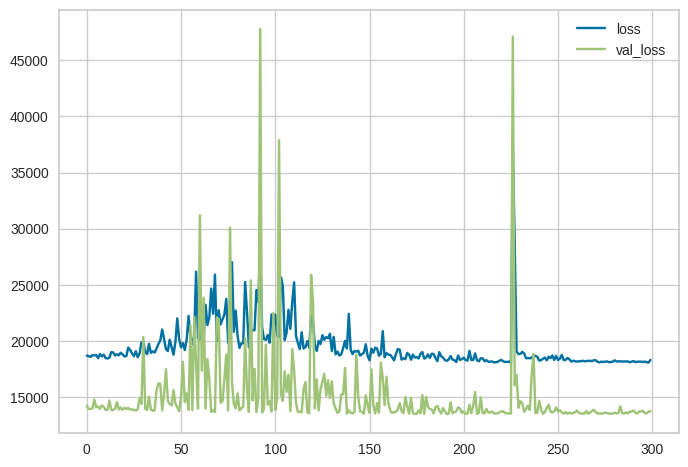

In [36]:
loss_df.plot()

In [37]:
tahmin=model.predict(x_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


In [38]:
from sklearn.metrics import mean_squared_error,r2_score

In [39]:
r2_score(y_test,tahmin)

-0.016100528729280805

In [40]:

mean_squared_error(y_test,tahmin)**.5

117.38789465557474

In [ ]:
mantıklı bir sonuca ulaşamadım